In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import house price dataset
data = pd.read_csv('housing.csv')
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


###### Dataframe info

In [3]:
print(f"Data shape: \n {data.shape} \n")
print(f"Data columns: \n {data.columns} \n")
print(f"Data index: \n {data.index} \n")
print(f"Data values: \n {data.values} \n")
print(f"Data info: \n {data.info} \n")
print(f"Data summary: \n")
data.describe()

Data shape: 
 (20640, 10) 

Data columns: 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object') 

Data index: 
 RangeIndex(start=0, stop=20640, step=1) 

Data values: 
 [[-122.23 37.88 41.0 ... 8.3252 452600.0 'NEAR BAY']
 [-122.22 37.86 21.0 ... 8.3014 358500.0 'NEAR BAY']
 [-122.24 37.85 52.0 ... 7.2574 352100.0 'NEAR BAY']
 ...
 [-121.22 39.43 17.0 ... 1.7 92300.0 'INLAND']
 [-121.32 39.43 18.0 ... 1.8672 84700.0 'INLAND']
 [-121.24 39.37 16.0 ... 2.3886 89400.0 'INLAND']] 

Data info: 
 <bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0  

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


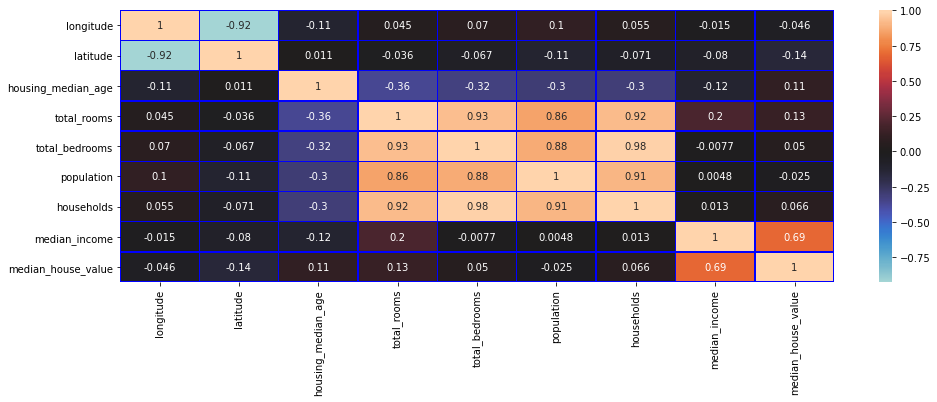

In [4]:
# Correlation matrix
data_numeric = data.drop('ocean_proximity', axis = 1)
corr_matrix_origin = data_numeric.corr(method ='pearson')
list_col_origin = list(data_numeric.columns)
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='blue', center=False,  linewidths=.5)

We have here highly correlated features such as total_rooms and total_bedrooms, total_rooms and population, total_rooms and households. Then, total_bedrooms and population, total_bedrooms and households, also population and households. 

#### Data visualisation

In [5]:
# Let see the distribution of each independent variable
# First we will define function for subplots of histograms
def sub_hist(data, m=15, n=25, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    if i == 1:
        for j in range(num_col):
            sns.distplot(data[data.columns[j]], ax=axes[j] )
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.distplot(data[data.columns[2*i+j]], ax=axes[i,j] )
                else:
                    axes[i,j].set_axis_off()


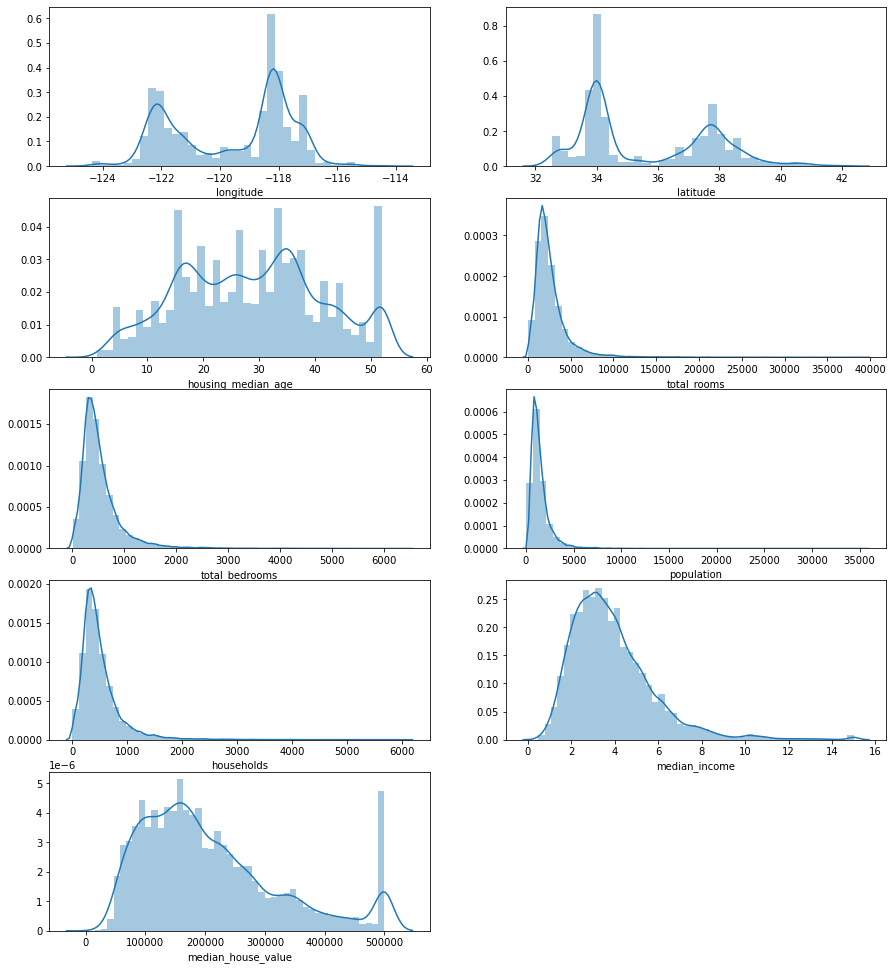

In [8]:
sub_hist(data = data.drop('ocean_proximity', axis = 1), m=15, n=17,num_col =2)

In [9]:
# Let create function for subplots of boxplots
def sub_boxplot(data, m=15, n=25, num_col = None, y=None, hue=None, orient='h', *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.boxplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, orient=orient , ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()

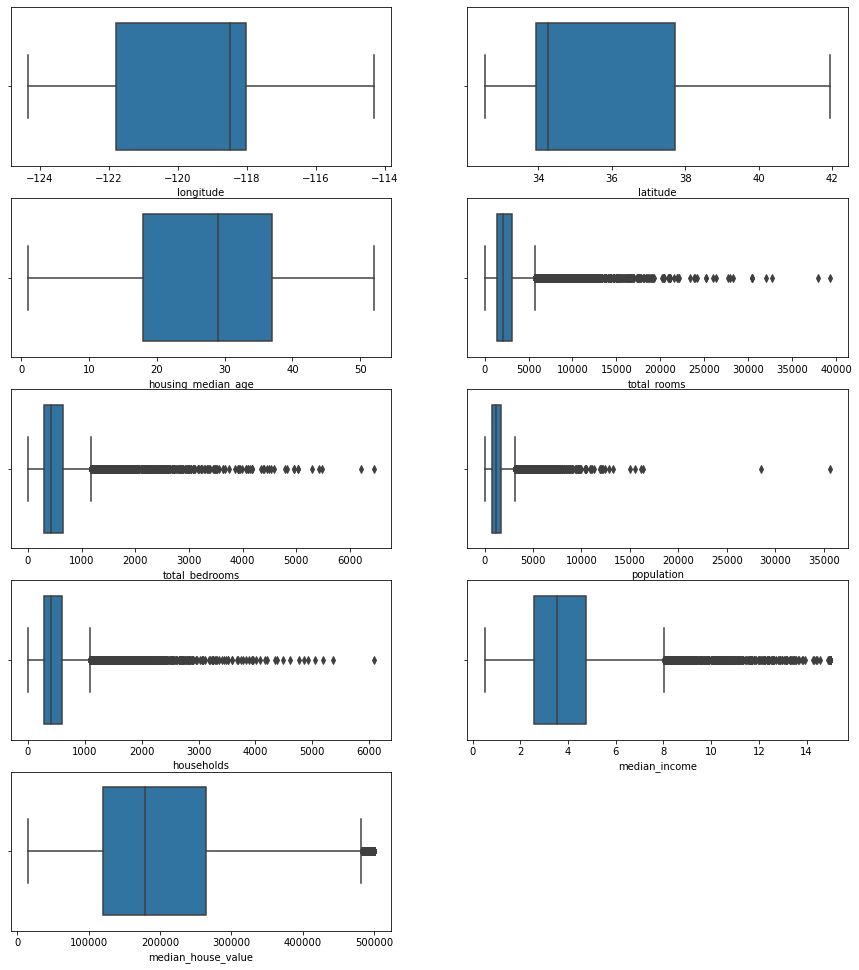

In [10]:
# Let see the distribution of each continual feature in dataset using boxplots
sub_boxplot(data = data.drop('ocean_proximity', axis=1),m=15,n=17, num_col = 2)

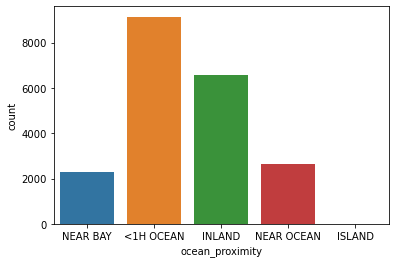

In [11]:
# Let see the distribution of nominal feature ocean_proximity
sns.countplot(data.ocean_proximity)

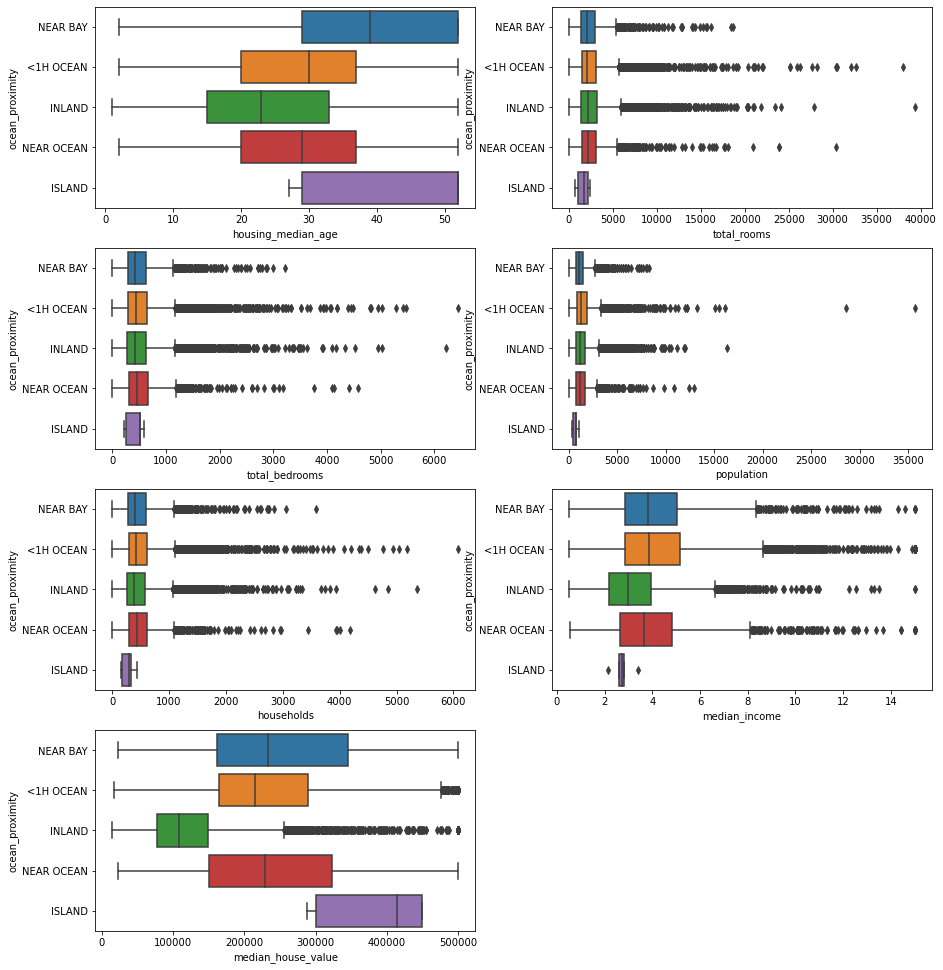

In [14]:
# Distribution of variables by ocean_proximity
fig, axes = plt.subplots(4, 2, figsize=(15, 17))
sns.boxplot(x=data.housing_median_age, y=data.ocean_proximity, ax = axes[0,0], orient = 'h')
sns.boxplot(x=data.total_rooms, y=data.ocean_proximity, ax = axes[0,1], orient = 'h')
sns.boxplot(x=data.total_bedrooms, y=data.ocean_proximity, ax = axes[1,0], orient = 'h')
sns.boxplot(x=data.population, y=data.ocean_proximity, ax = axes[1,1], orient = 'h')
sns.boxplot(x=data.households, y=data.ocean_proximity, ax = axes[2,0], orient = 'h')
sns.boxplot(x=data.median_income, y=data.ocean_proximity, ax = axes[2,1], orient = 'h')
sns.boxplot(x=data.median_house_value, y=data.ocean_proximity, ax = axes[3,0], orient = 'h')
axes[3,1].set_axis_off()

In [15]:
# Let create function for ploting scatter plot between variables
def sub_scatterplot(data, m=15, n=25, y = None, hue = None, num_col = None, *args):
    num = 2 if hue else 1
    if (data.shape[1]-num) %2 == 0:
        i = (data.shape[1]-num)//num_col
    else:
        i = (data.shape[1]-num)//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    data_col = list(data.columns)
    data_col = [x for x in data_col if x not in {y, hue}]
    if i == 1:
        for j in range(num_col):
            sns.scatterplot(x = data_col[j], y=y, data=data, hue=hue, ax=axes[j])
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < (data.shape[1]-num):
                    sns.scatterplot(x = data_col[2*i+j], y=y, data=data, hue=hue, ax=axes[i,j])
                else:
                    axes[i,j].set_axis_off()

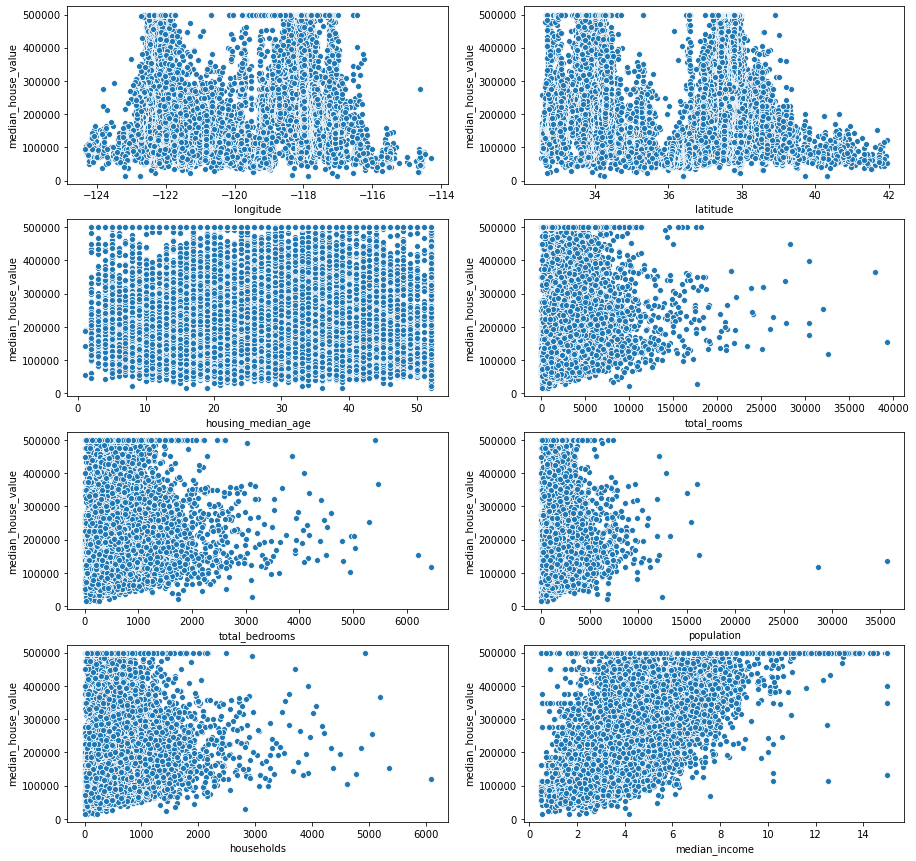

In [17]:
# Let see the distribution of each feature and target variable
sub_scatterplot(data = data.drop('ocean_proximity', axis = 1), y ='median_house_value', m=15, n=15, num_col = 2)

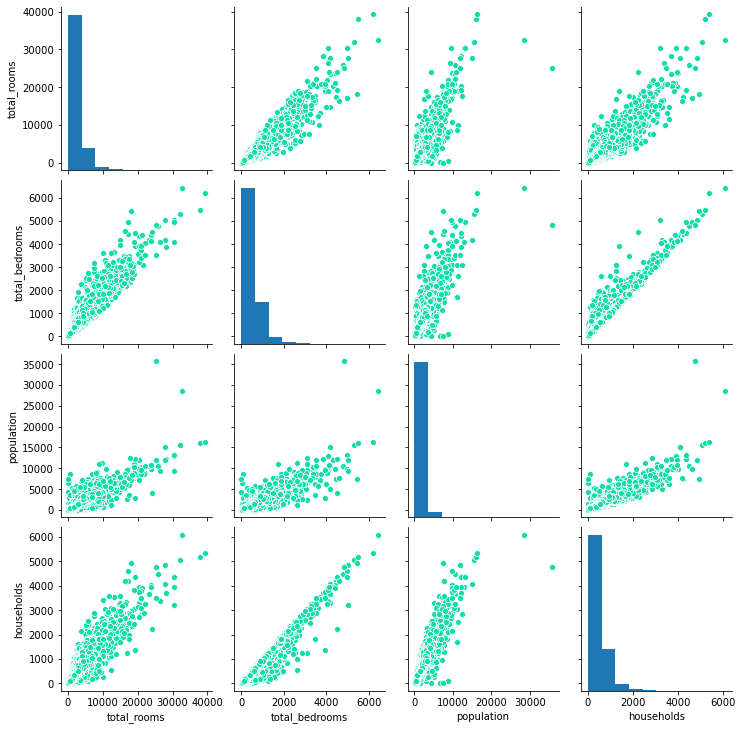

In [22]:
# Let see the relationship between the features with the highest correlation
sns.pairplot(data = data.loc[:, ['total_rooms', 'total_bedrooms', 'population', 'households']], plot_kws={'color':'#0EDCA9'})

We can conclude that there are strong linear relationship between total_rooms, total_bedrooms, population and housholds

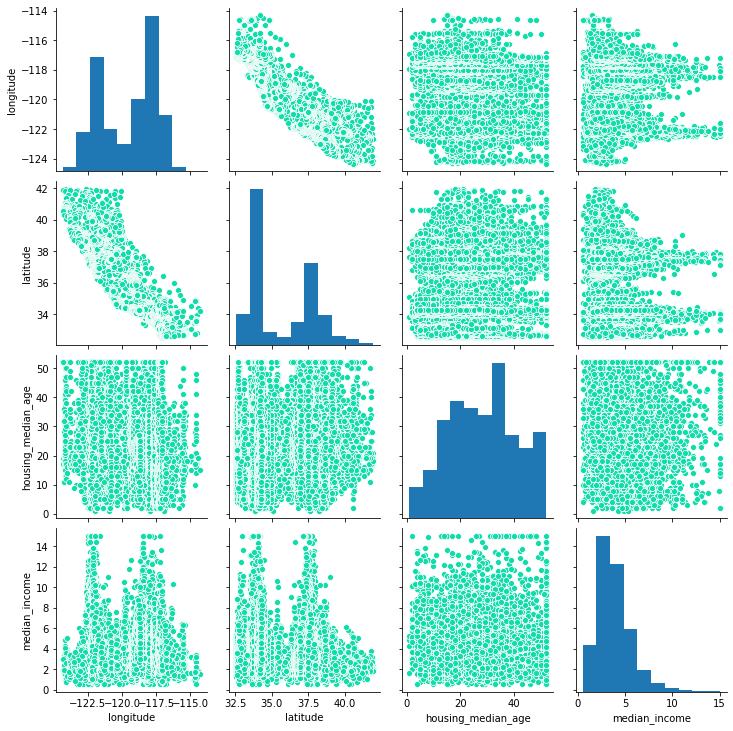

In [21]:
# Let see the relationship between each  left over feature in dataset
sns.pairplot(data = data.drop(['total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value'], axis = 1), plot_kws={'color':'#0EDCA9'})

As we can see from previous chart there aren't significant linear relationship between left over features

#### Handling categorical / nominal data

In [23]:
# Let use OneHotEncoder for nominal features ocean_proximity
from sklearn.preprocessing import OneHotEncoder
data_2 = data.copy()
ohe = OneHotEncoder()
ohe.fit(data_2.loc[:, ['ocean_proximity']])
df_enc = pd.DataFrame(ohe.transform(data_2.loc[:, ['ocean_proximity']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(5)

,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [24]:
# Now we will merge this two dataframes data_2 and df_enc by index
data_merge = pd.concat([data_2,df_enc], axis=1)

In [25]:
# Merged dataframe
data_merge.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


#### Dealing with missing data

In [26]:
# Missing values in whole dataset
data_merge.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
x0_<1H OCEAN            0
x0_INLAND               0
x0_ISLAND               0
x0_NEAR BAY             0
x0_NEAR OCEAN           0
dtype: int64

In [36]:
data_without_nan = data_merge.dropna()
data_with_nan = data_merge[pd.isnull(data_merge).any(axis=1)]

In [42]:
data_without_nan['perc_of_total_bedrooms_per_room'] = data_without_nan['total_bedrooms']/data_without_nan['total_rooms']
mean_percentage = data_without_nan['perc_of_total_bedrooms_per_room'].mean()
print(f"Mean percentage total bedrooms per total rooms is {mean_percentage:.2f}")

Mean percentage total bedrooms per total rooms is 0.21


C:\Users\korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
data_2 = data_merge.copy()
data_2['total_bedrooms'].fillna(round(data_2.total_rooms * mean_percentage), inplace = True)
data_2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
x0_<1H OCEAN          0
x0_INLAND             0
x0_ISLAND             0
x0_NEAR BAY           0
x0_NEAR OCEAN         0
dtype: int64

#### Split dataset on train and test

In [47]:
print(data_2.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'x0_<1H OCEAN', 'x0_INLAND',
       'x0_ISLAND', 'x0_NEAR BAY', 'x0_NEAR OCEAN'],
      dtype='object')


In [48]:
X = data_2.drop(['ocean_proximity', 'median_house_value'], axis = 1)
y = data_2.median_house_value
display(X.head(2))
display(y)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [49]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14448, 13)
y_train shape: (14448,)
X_test shape: (6192, 13)
y_test shape: (6192,)


#### Bringing features onto the same scale¶

In [51]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [52]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

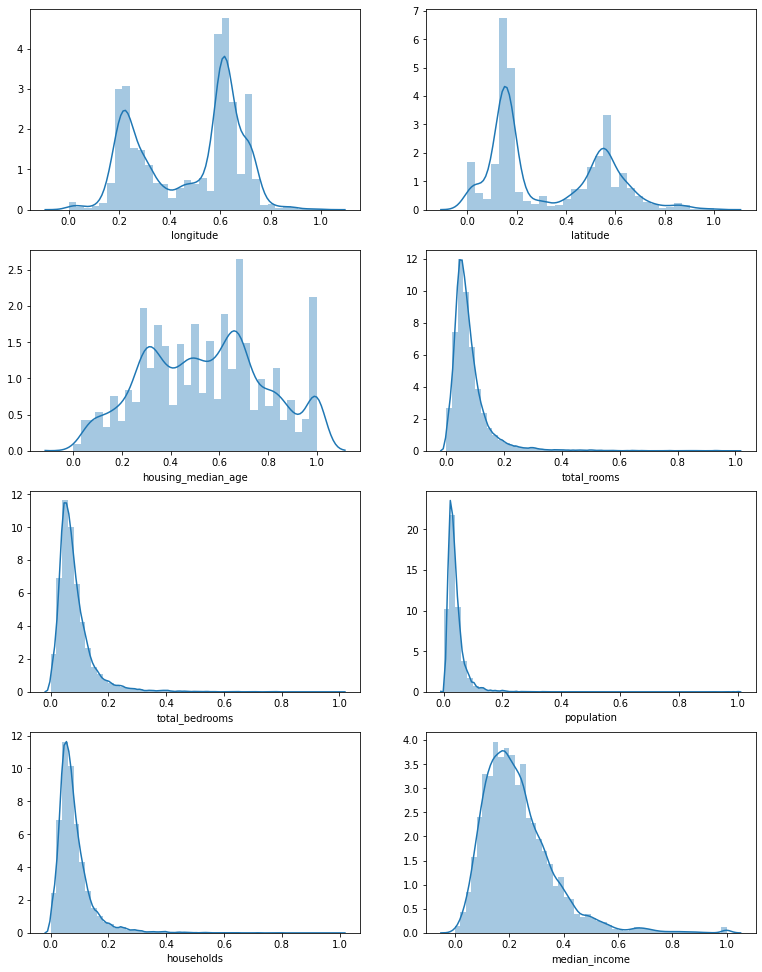

In [54]:
# Distribution of normalized train data
col_names = list(X_train.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
sub_hist(data = df_norm.drop(['x0_<1H OCEAN', 'x0_INLAND','x0_ISLAND', 'x0_NEAR BAY', 'x0_NEAR OCEAN'], axis=1),m=13,n=17, num_col = 2)

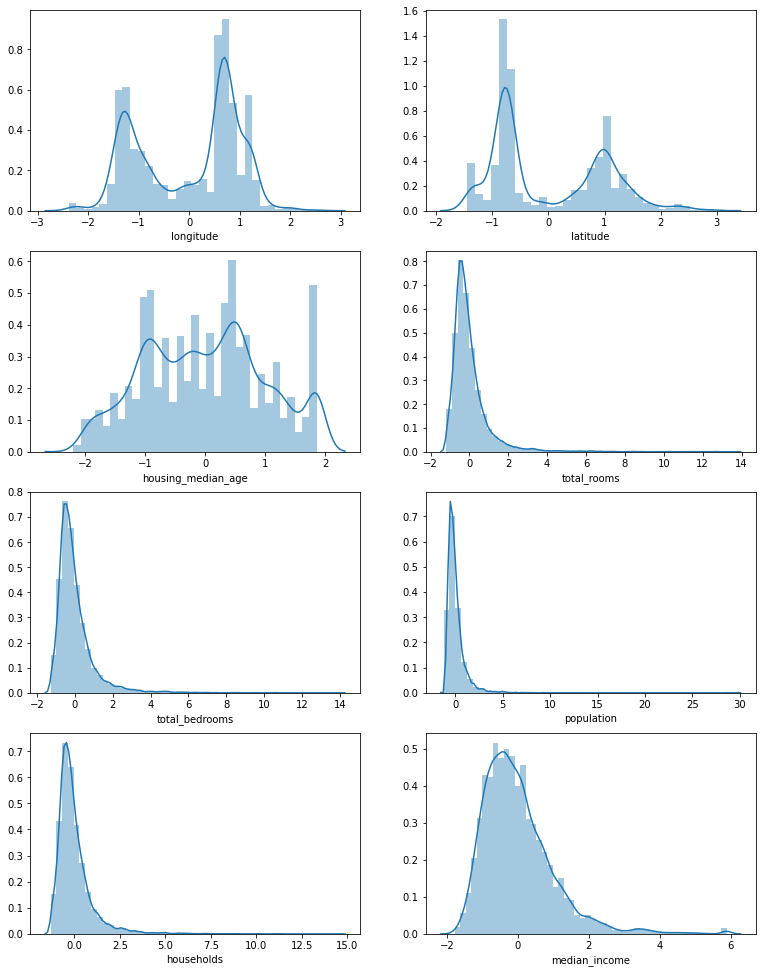

In [55]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
sub_hist(df_std.drop(['x0_<1H OCEAN', 'x0_INLAND','x0_ISLAND', 'x0_NEAR BAY', 'x0_NEAR OCEAN'], axis=1),m=13,n=17, num_col = 2)

#### Data modeling

Let put 10 or more different models on standardized and balanced train dataset and than compare which one is modelling the best.

In [56]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}

In [57]:
# Define function for train,fit and predict new outcomes 
def train_model(model, X_train, y_train, X_test, y_test, model_name, acc_scores = mean_sq_err_std):
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross_val_scores: {scores} \n ")
    print(f"Cross_val_scores_mean: {scores.mean()} \n ")
    print(f"Cross_val_scores_std: {scores.std()} \n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean error of {model_name}: {acc_scores[model_name]}")
    return model, acc_scores, y_pred

In [58]:
# First model SVC kernel linear
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model_1 = train_model(svr_linear, X_train_std, y_train, X_test_std, y_test, 'svr_linear')

Cross_val_scores: [0.07983279 0.05899504 0.07677689 0.0718599  0.0656216 ] 
 
Cross_val_scores_mean: 0.07061724403523591 
 
Cross_val_scores_std: 0.007542462572616774 

Mean error of svr_linear: 12018601880.658203


In [59]:
mean_abs_err_std['svr_linear'] = mean_absolute_error(np.array(y_test), model_1[2])
mean_abs_err_std['svr_linear']

80018.43510020775

In [60]:
# Second model SVR_rbf
SVR_rbf = SVR()
model_2 = train_model(SVR_rbf, X_train_std, y_train, X_test_std, y_test, 'SVR_rbf')

Cross_val_scores: [-0.03915632 -0.0577036  -0.0422006  -0.05073722 -0.05378232] 
 
Cross_val_scores_mean: -0.04871601306115898 
 
Cross_val_scores_std: 0.006990962693349156 

Mean error of SVR_rbf: 13963152516.665478


In [61]:
mean_abs_err_std['SVR_rbf'] = mean_absolute_error(np.array(y_test), model_2[2])
mean_abs_err_std['SVR_rbf']

88186.50878093128

In [62]:
# Third model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model_3 = train_model(ran_for_reg, X_train_std, y_train, X_test_std, y_test, 'ran_for_reg')

Cross_val_scores: [0.80535612 0.80797079 0.81050976 0.81589069 0.82479525] 
 
Cross_val_scores_mean: 0.8129045222221875 
 
Cross_val_scores_std: 0.006890016102577536 

Mean error of ran_for_reg: 2460329069.5319037


In [63]:
mean_abs_err_std['ran_for_reg'] = mean_absolute_error(np.array(y_test), model_3[2])
mean_abs_err_std['ran_for_reg']

32052.072435400518

In [64]:
# Fourth model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model_4 = train_model(lin_reg, X_train_std, y_train, X_test_std, y_test, 'lin_reg')

Cross_val_scores: [0.65247385 0.63526215 0.65188281 0.65296721 0.63452537] 
 
Cross_val_scores_mean: 0.6454222786885102 
 
Cross_val_scores_std: 0.008606508824321351 

Mean error of lin_reg: 4758622307.313278


In [65]:
# Mean absolute error for LinearRegression
mean_abs_err_std['lin_reg'] = mean_absolute_error(np.array(y_test), model_4[2])
mean_abs_err_std['lin_reg']

49541.98204550469

Text(0, 0.5, 'Testing Accuracy')

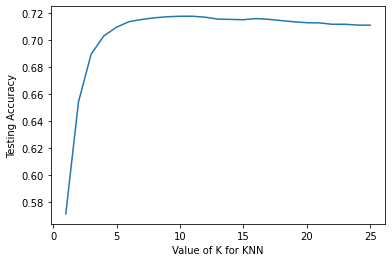

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.mean_squared_error(y_test,y_pred)
        scores_list.append(metrics.r2_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [67]:
# Let see scores
for k in range(1,20):
    print(f"{k}: {scores_list[k]}")

1: 0.6540984185722851
2: 0.6895004543249897
3: 0.7029526558089796
4: 0.7094278342265419
5: 0.7135342484370184
6: 0.7151376357231625
7: 0.716362365906599
8: 0.7171617914209725
9: 0.7175141182173221
10: 0.7175198492286494
11: 0.7167997750781403
12: 0.7153711956089395
13: 0.7151763698335398
14: 0.7149549518219513
15: 0.7157892224026099
16: 0.71523165781503
17: 0.7142947745795152
18: 0.7133998500705936
19: 0.7127241085511128


In [68]:
models_KNN = {}
for k in [7,8,9]:
    KNN = KNeighborsRegressor(n_neighbors=k)
    print(f"Results of KNN with {k} neighbors: \n ")
    
    models_KNN['KNN_' + str(k)+'_neigh'] = train_model(KNN, X_train_std, y_train, X_test_std, y_test, model_name ='KNN_'+str(k))

Results of KNN with 7 neighbors: 
 
Cross_val_scores: [0.71762027 0.7093068  0.716983   0.72400925 0.72447942] 
 
Cross_val_scores_mean: 0.7184797503177506 
 
Cross_val_scores_std: 0.0055442474600830875 

Mean error of KNN_7: 3797889859.904735
Results of KNN with 8 neighbors: 
 
Cross_val_scores: [0.72207791 0.71234969 0.71717837 0.72491336 0.72817884] 
 
Cross_val_scores_mean: 0.7209396346380699 
 
Cross_val_scores_std: 0.005611175575817042 

Mean error of KNN_8: 3781561306.4413786
Results of KNN with 9 neighbors: 
 
Cross_val_scores: [0.72375636 0.71378139 0.71728415 0.72228527 0.72733114] 
 
Cross_val_scores_mean: 0.720887661777669 
 
Cross_val_scores_std: 0.004799700305283506 

Mean error of KNN_9: 3770903071.32318


In [69]:
# Mean absolute error for KNN Regressor
mean_abs_err_std['KNN_7'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_7_neigh'][2])
mean_abs_err_std['KNN_8'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_8_neigh'][2])
mean_abs_err_std['KNN_9'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_9_neigh'][2])
print(f"MAE for KNN_7: {mean_abs_err_std['KNN_7']} \n")
print(f"MAE for KNN_8: {mean_abs_err_std['KNN_8']} \n")
print(f"MAE for KNN_9: {mean_abs_err_std['KNN_9']} \n")

MAE for KNN_7: 41496.95897932816 

MAE for KNN_8: 41357.83468588501 

MAE for KNN_9: 41308.548341946596 



In [70]:
# 8th XGBoostRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Fit the model
xg_reg.fit(X_train_std,y_train)
# Test model
y_pred = xg_reg.predict(X_test_std)
mean_sq_err_std['xgb_reg_squarederror'] = mean_squared_error(y_test, y_pred)
mean_abs_err_std['xgb_reg_squarederror'] = mean_absolute_error(y_test, y_pred)
print(f"MSE for XGBoost Regressor: {mean_sq_err_std['xgb_reg_squarederror']} \n")
print(f"MSA for XGBoost Regressor: {mean_abs_err_std['xgb_reg_squarederror']} \n")

MSE for XGBoost Regressor: 13403014911.07597 

MSA for XGBoost Regressor: 79907.87755874515 



In [71]:
# 9th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model_9 = train_model(dec_tree_reg, X_train_std, y_train, X_test_std, y_test, model_name = 'dec_tree_reg')

Cross_val_scores: [0.62880663 0.63368433 0.65407927 0.61966016 0.60549095] 
 
Cross_val_scores_mean: 0.6283442682250814 
 
Cross_val_scores_std: 0.01605433418247642 

Mean error of dec_tree_reg: 4731148573.170219


In [72]:
# Mean absolute error for DecisionTreeRegressor
mean_abs_err_std['dec_tree_reg'] = mean_absolute_error(np.array(y_test), model_9[2])
mean_abs_err_std['dec_tree_reg']

43079.27487080103

In [73]:
# 10th model ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_reg_extra_tree = BaggingRegressor(extra_tree, random_state=0)
model_10 = train_model(bag_reg_extra_tree, X_train_std, y_train, X_test_std, y_test, model_name = 'bag_reg_extra_tree')

Cross_val_scores: [0.75446433 0.75215449 0.76124174 0.76990919 0.7510944 ] 
 
Cross_val_scores_mean: 0.75777282996214 
 
Cross_val_scores_std: 0.007020511517119026 

Mean error of bag_reg_extra_tree: 3129031564.384797


In [74]:
# Mean absolute error for DecisionTreeRegressor
mean_abs_err_std['bag_reg_extra_tree'] = mean_absolute_error(np.array(y_test), model_10[2])
mean_abs_err_std['bag_reg_extra_tree']

37736.7309754522

In [75]:
# Lets plot the results of models
df_MSE = pd.DataFrame({'models': list(mean_sq_err_std.keys()),
                          'models_err': list(mean_sq_err_std.values())})
df_MSE

,models,models_err
0,svr_linear,1.201860e+10
1,SVR_rbf,1.396315e+10
2,ran_for_reg,2.460329e+09
3,lin_reg,4.758622e+09
4,KNN_7,3.797890e+09
5,KNN_8,3.781561e+09
6,KNN_9,3.770903e+09
7,xgb_reg_squarederror,1.340301e+10
8,dec_tree_reg,4.731149e+09
9,bag_reg_extra_tree,3.129032e+09


In [76]:
# Lets plot the results of models MAE
df_MAE = pd.DataFrame({'models': list(mean_abs_err_std.keys()),
                          'models_err': list(mean_abs_err_std.values())})
df_MAE

,models,models_err
0,svr_linear,80018.435100
1,SVR_rbf,88186.508781
2,ran_for_reg,32052.072435
3,lin_reg,49541.982046
4,KNN_7,41496.958979
5,KNN_8,41357.834686
6,KNN_9,41308.548342
7,xgb_reg_squarederror,79907.877559
8,dec_tree_reg,43079.274871
9,bag_reg_extra_tree,37736.730975


[Text(0, 0.5, 'models_err')]

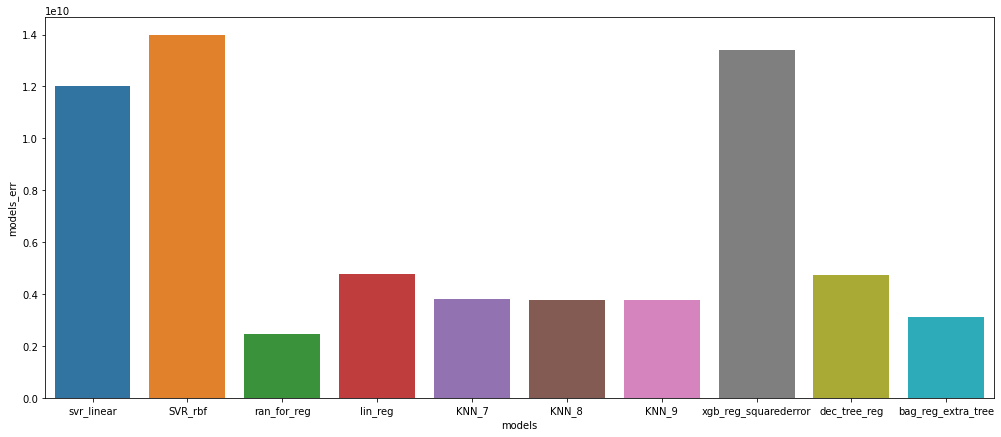

In [77]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_err", data = df_MSE)
ax.set(ylabel = "models_err")

In [78]:
# Let see which model gives the best result
print(f"The model with the smallest error is {min(mean_sq_err_std, key=mean_sq_err_std.get)} and it's error is {mean_sq_err_std[min(mean_sq_err_std, key=mean_sq_err_std.get)]:.3f}.")

The model with the smallest error is ran_for_reg and it's error is 2460329069.532.


[Text(0, 0.5, 'models_err')]

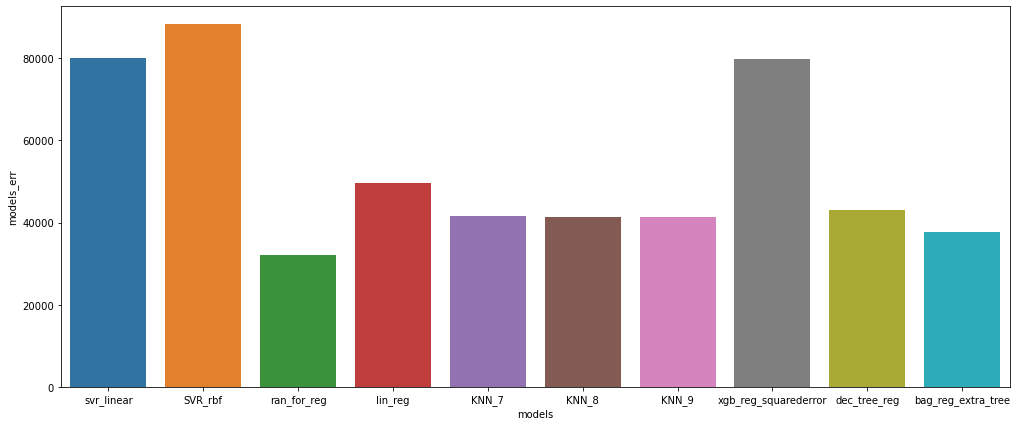

In [79]:
# Let see the results with MAE
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_err", data = df_MAE)
ax.set(ylabel = "models_err")

In [80]:
# Let see which model gives the best result
print(f"The model with the smallest mean abs error is {min(mean_abs_err_std, key=mean_abs_err_std.get)} and it's error is {mean_abs_err_std[min(mean_abs_err_std, key=mean_abs_err_std.get)]:.3f}.")

The model with the smallest mean abs error is ran_for_reg and it's error is 32052.072.
